<h1><center>Assignment 2</center></h1>
<h1><center>Class: AML 1403</center></h1>
<h1><center>Artificial Intelligence – A Canadian Perspective</center></h1><br><br><br><br><br><br><br><br><br>
<h1><center>Instructor: Mohammad Islam</center></h1>
<h1><center>Submitted By</center></h1>
<h1><center>Camilo Espitia (C0785089)</center>
<h1><center>Deval Arora (C0787539)</center>
<h1><center>Jonatas Aguiar (C0790419)</center>
<h1><center>Saurabh Deswal (C0787134)</center><br><br><br><br><br><br>
<h1><center>Lambton College In Toronto</center></h1>
<h1><center>17 December 2020</center></h1>

### Aim: Using an ANN model, demonstrate classification and compare the result with statistical model using UCI dataset.
- Use a statistical model to perform binary classification
- Use ANN model for doing the same.
- Present the results using confusion matrix.
- Calculate Accuracy
- Show the precision
- Show Recall
- Compute Harmonic mean (F1-score)
- Compare the performance of two algorithms for your dataset

* **Data preprocessing:**
    1. Load the data set into a data frame
    2. Are there any missing values in the dataset? How to handle that.

* **Data visualization:**
    1. Use Data visualization techniques to plot in graphs.
    2. Use a measure of central tendency for each feature.

* **Statistical Modelling: Random Forest Classifier and Logistics Regression**
    1. Explore random split of data as test and training set using Python.
    2. Use the training data set to train the classification model.
    3. Observe the performance of the model with test data set.
    4. Create a confusion matrix to present the result.
    

* **Artificial Neural Network(ANN): Using Pytorch**
    1. Explore random split of data as test and training set using Python.
    2. Use the training data set to train the neural network.
    3. Observe the performance of the model with test data set.
    4. Create a confusion matrix to present the result.

## Data Loading & Inspection

**Context**


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

---



**Content**

Attribute Information:
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)


### Part 1: Data Preprocessing 

In [1]:
#import required libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

sns.set()   # Set the style for graphs
warnings.filterwarnings('ignore')   # Ignore all warnings

%matplotlib inline

**Source of the dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database** : 

In [2]:
#Loading the dataset using pandas
df = pd.read_csv('diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
#provides the information about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Part 2: Data Visualization

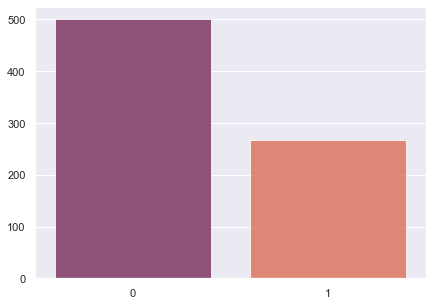

In [5]:
#The count of pateints with outcome 0 is more than count of people with outcome 1
patient_count = df['Outcome'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(patient_count.index, patient_count.values, alpha=0.8 , palette = 'rocket')

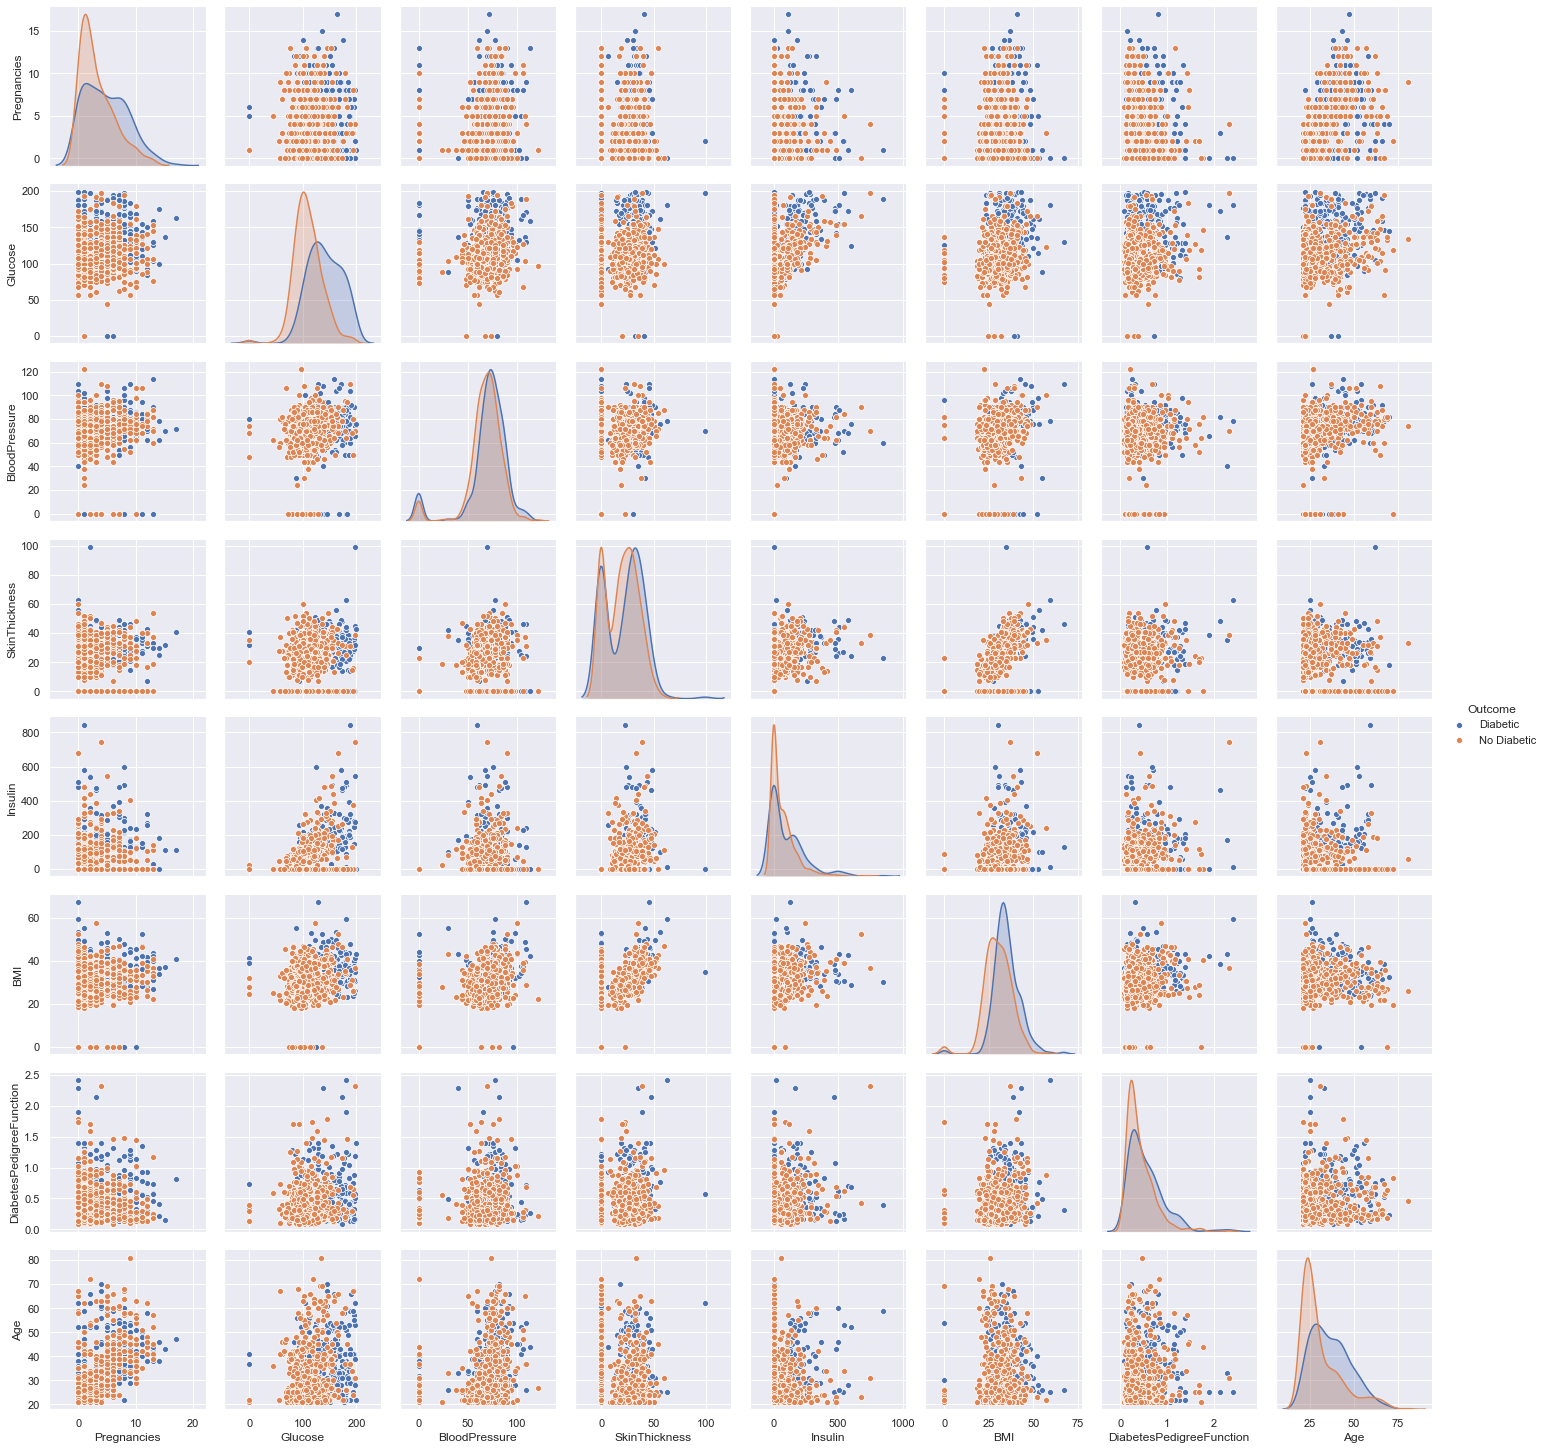

In [125]:
#The pair plot helps in plotting plotting all the relations between independant variables with their dependant variable
df["Outcome"] = np.where(df["Outcome"] == 1 ,"Diabetic","No Diabetic")
sns.pairplot(df , hue ="Outcome")

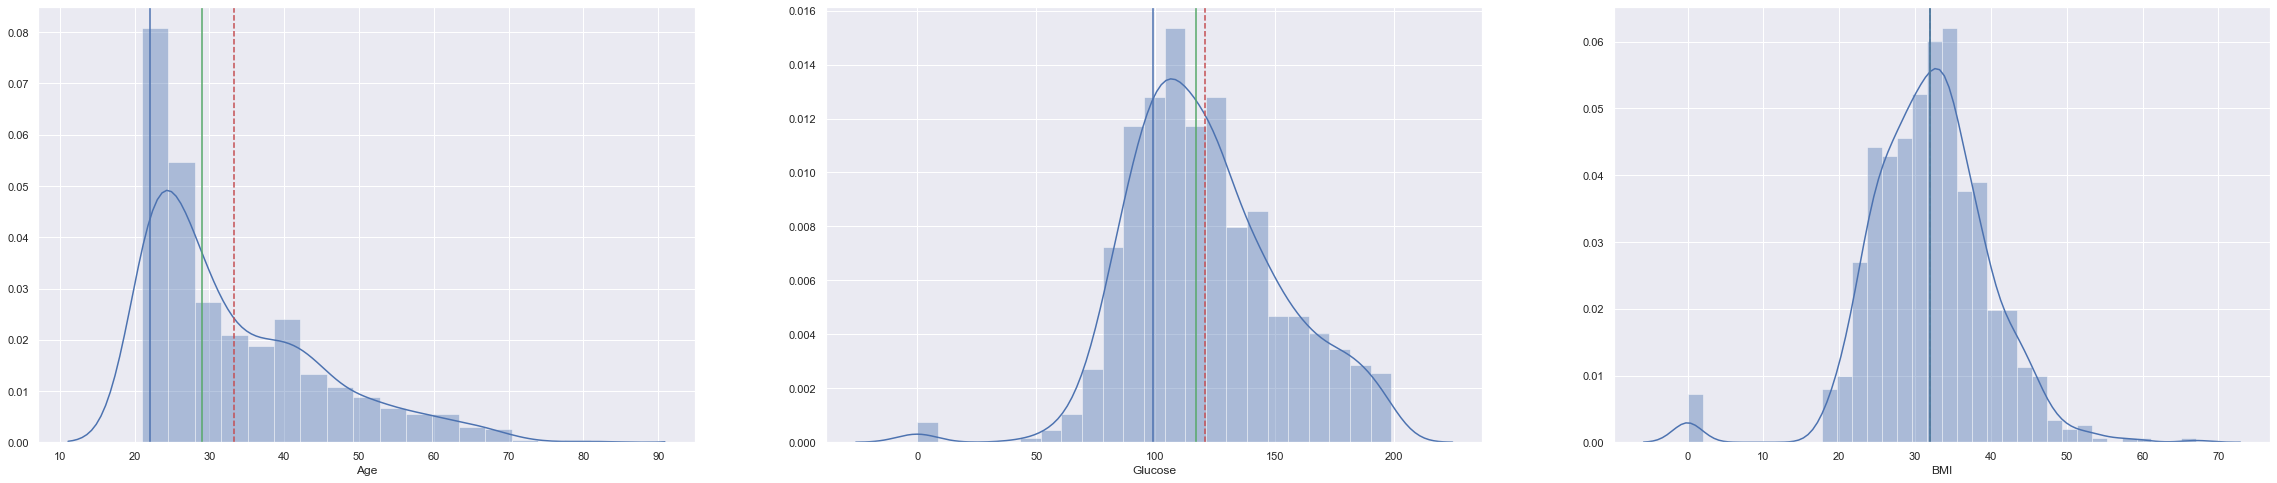

In [6]:
# Printing measure of central tendency for features Glucose, BMI, and Age 
f, (ax_box, ax_box2, ax_box3) = plt.subplots(1, 3,figsize=(40,8))

# --------------Age ------------------
mean=df['Age'].mean()
median=df['Age'].median()
mode=df['Age'].mode().tolist()[0]

sns.distplot(df["Age"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

ax_box.set(xlabel='Age')

# ----------- Glucose -------------
mean2=df['Glucose'].mean()
median2=df['Glucose'].median()
mode2=df['Glucose'].mode().tolist()[0]

sns.distplot(df["Glucose"], ax=ax_box2)
ax_box2.axvline(mean2, color='r', linestyle='--')
ax_box2.axvline(median2, color='g', linestyle='-')
ax_box2.axvline(mode2, color='b', linestyle='-')

ax_box2.set(xlabel='Glucose')

# -----------------BMI  ---------------------
mean3=df['BMI'].mean()
median3=df['BMI'].median()
mode3=df['BMI'].mode().tolist()[0]

sns.distplot(df["BMI"], ax=ax_box3)
ax_box3.axvline(mean3, color='r', linestyle='--')
ax_box3.axvline(median3, color='g', linestyle='-')
ax_box3.axvline(mode3, color='b', linestyle='-')
ax_box3.set(xlabel='BMI')

plt.show()

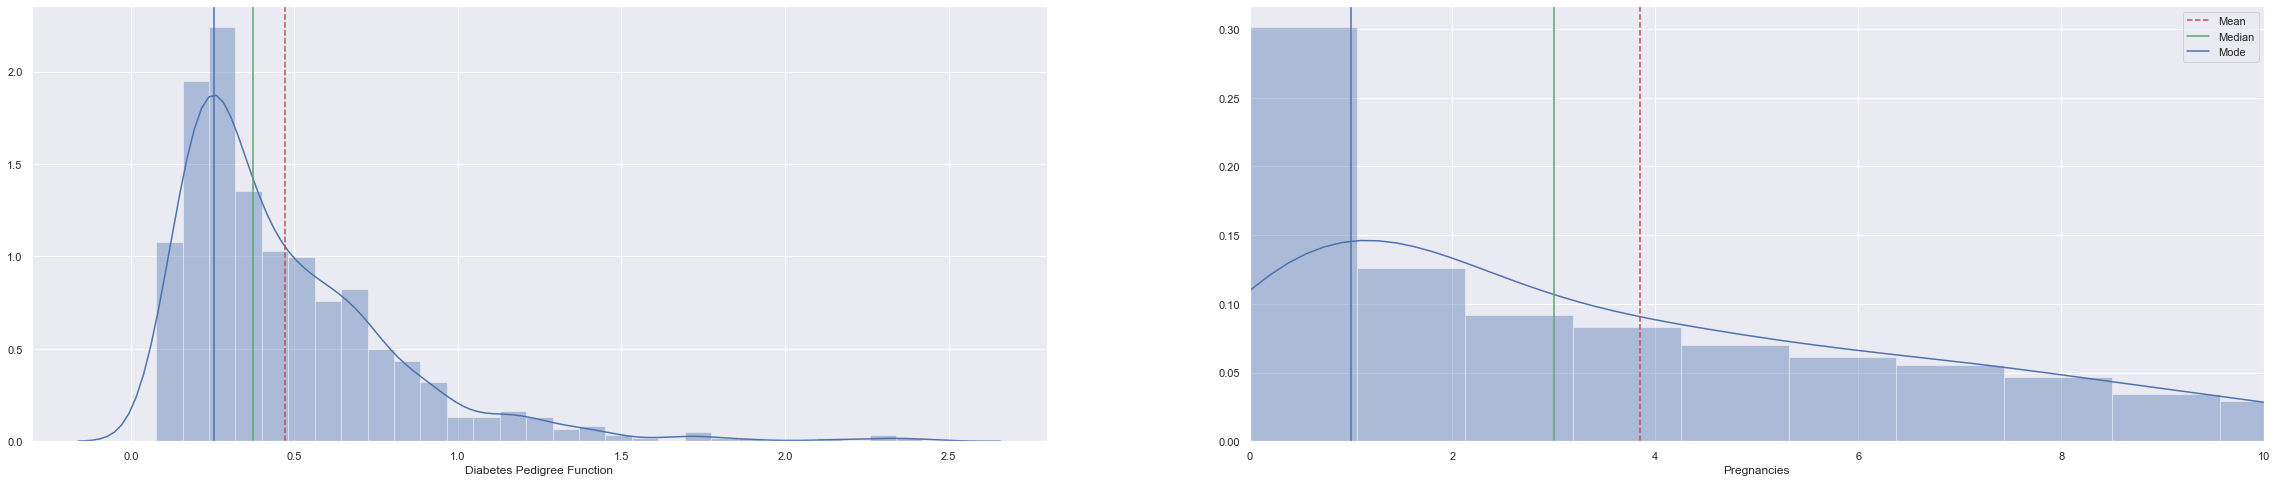

In [127]:
# Printing measure of central tendency for features DiabetesPedigreeFunction, Pregnancies, and oldpeak

f, (ax_box4,ax_box5) = plt.subplots(1, 2,figsize=(40,8))


# ---------------------------------

mean4=df['DiabetesPedigreeFunction'].mean()
median4=df['DiabetesPedigreeFunction'].median()
mode4=df['DiabetesPedigreeFunction'].mode().tolist()[0]

sns.distplot(df["DiabetesPedigreeFunction"], ax=ax_box4)
ax_box4.axvline(mean4, color='r', linestyle='--')
ax_box4.axvline(median4, color='g', linestyle='-')
ax_box4.axvline(mode4, color='b', linestyle='-')

ax_box4.set(xlabel='Diabetes Pedigree Function')

# --------------Pregnancies ----------------
mean5=df['Pregnancies'].mean()
median5=df['Pregnancies'].median()
mode5=df['Pregnancies'].mode().tolist()[0]

sns.distplot(df["Pregnancies"], ax=ax_box5)
ax_box5.set_xlim(0,10)
ax_box5.axvline(mean5, color='r', linestyle='--')
ax_box5.axvline(median5, color='g', linestyle='-')
ax_box5.axvline(mode5, color='b', linestyle='-')

ax_box5.set(xlabel='Pregnancies')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

plt.show()

In [8]:
# Correlation table
ht=df.corr()
ht.round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


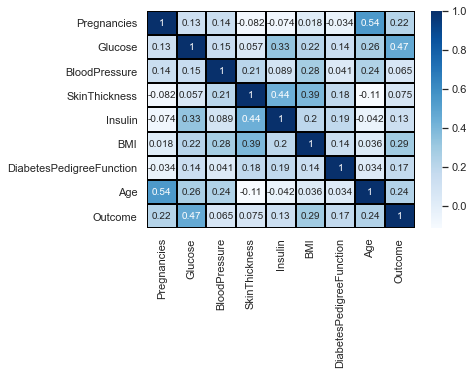

In [9]:
# There are no strong correlation between the atttributes
# Printing correlation matrix using heatmap for visualization purposes.
sns.heatmap(ht, cmap="Blues", linecolor="black", linewidths=1, annot= True)

### Part 3: Supervised Learning

In [130]:
# printing the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


### Splitting The Dataset Into Training & Test Datasets 
The data will be divided into test and training datasets. The training dataset will be used to train the model, and the test dataset will be used to test the model’s performance.

While splitting the data into training and test datasets, two things come into the picture:
1. **Test Size**<br> 
This parameter defines the percentage of the data used to test the model’s performance. For example, if the test size is 0.25, then 25% of data will form test data, and the remaining 75% will create training data. The value of this parameter is between 0 and 1 and can be an int or float.<br><br>  
2. **Random State**<br>
This parameter controls the shuffling applied to the data before it is split. For example, consider that the data under consideration has 100 records. If the random state is set to 5, then the first ten records (1 -10) may form a part of the test dataset, but if the random state is 15, it can be the case that records from 11 to 20 become part of the test dataset.<br> This virtually affects the conclusions about the model’s performance, as the test datasets for different random states may or may not be alike (well balanced, not biased), and accuracy results will vary. To overcome this problem, a random state is always specified so that any random state is not picked up during the time of execution.

In [10]:
# random split
# test_size = 0.25
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome' , axis = 1) #independent Feature
y = df['Outcome'] #dependent Feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
693,7,129,68,49,125,38.5,0.439,43
173,1,79,60,42,48,43.5,0.678,23
561,0,198,66,32,274,41.3,0.502,28
82,7,83,78,26,71,29.3,0.767,36
702,1,168,88,29,0,35.0,0.905,52


### Training The Model
The datasets that we created above will be used to train the model. This will be done using Random Forest Classifier, and Logistics Regression.

**Random Forest and Logistics Regression**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix


logreg = LogisticRegression(random_state=58)
logreg.fit(X_train, y_train)
y_hat_lr = logreg.predict(X_test)

rfc = RandomForestClassifier(random_state=58)
rfc.fit(X_train, y_train)
y_hat_rf = rfc.predict(X_test)

### Model Performance
To check for the performace of the model, we will use accuracy score to determine the percentage of predicted values that the model got correct.

Classification report for Logistics Regression: 
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       118
           1       0.84      0.50      0.63        74

    accuracy                           0.77       192
   macro avg       0.80      0.72      0.73       192
weighted avg       0.79      0.77      0.75       192

Classification report for Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       118
           1       0.78      0.53      0.63        74

    accuracy                           0.76       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192



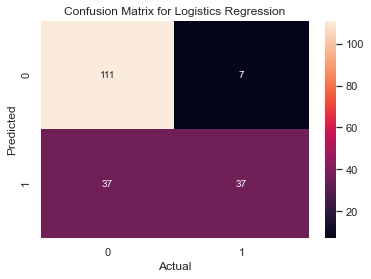

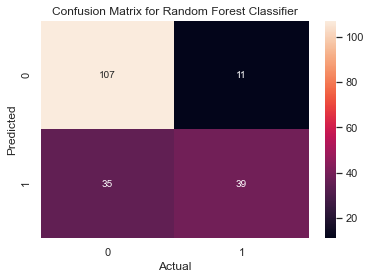

In [15]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

print(color.BOLD + 'Classification report for Logistics Regression: ' + color.END)
print(classification_report(y_test, y_hat_lr))

print(color.BOLD + 'Classification report for Random Forest Classifier: ' + color.END)
print(classification_report(y_test, y_hat_rf))

cm_lr = confusion_matrix(y_test,y_hat_lr)
sns.heatmap(cm_lr,annot=True,fmt='g')
plt.title('Confusion Matrix for Logistics Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

cm_rf = confusion_matrix(y_test,y_hat_rf)
sns.heatmap(cm_rf,annot=True,fmt='g')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


### Part 4: Artificial Neural Network Using Pytorch

In [16]:
# random split
# test_size = 0.25
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome' , axis = 1) #independent Feature
y = df['Outcome'] #dependent Feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40


In [17]:
#Import required libraries for Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
# Creating Tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [19]:
#Creating the Model
class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20, hidden2=10,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [21]:
#To know the parameters used in the model
torch.manual_seed(20)
model = ANN_model()

model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)>

In [22]:
# Backward Propergation - loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [23]:
epochs=500
final_losses=[]
for i in range(epochs):
    i= i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 7.216089725494385
Epoch number: 11 and the loss : 0.8452132940292358
Epoch number: 21 and the loss : 0.7213758826255798
Epoch number: 31 and the loss : 0.688170313835144
Epoch number: 41 and the loss : 0.6361590623855591
Epoch number: 51 and the loss : 0.6123934984207153
Epoch number: 61 and the loss : 0.6054776906967163
Epoch number: 71 and the loss : 0.5972273945808411
Epoch number: 81 and the loss : 0.5894685387611389
Epoch number: 91 and the loss : 0.5814495086669922
Epoch number: 101 and the loss : 0.5752977132797241
Epoch number: 111 and the loss : 0.5699350833892822
Epoch number: 121 and the loss : 0.5644474029541016
Epoch number: 131 and the loss : 0.5596842169761658
Epoch number: 141 and the loss : 0.5551649928092957
Epoch number: 151 and the loss : 0.550214409828186
Epoch number: 161 and the loss : 0.5458102226257324
Epoch number: 171 and the loss : 0.5387787222862244
Epoch number: 181 and the loss : 0.5335638523101807
Epoch number: 191 and the 

In [24]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())


Text(0.5, 0, 'Epochs')

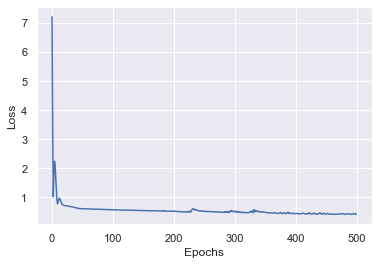

In [25]:
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

[[118  12]
 [ 34  28]]


Text(30.5, 0.5, 'Predicted')

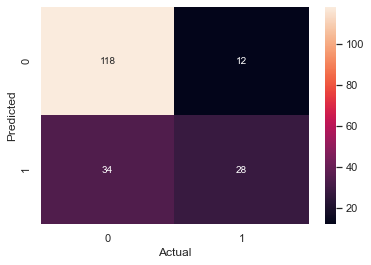

In [27]:
cm = confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

## Part 5: Analysis and conclusion on the performance of various models

In [144]:
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Random Forest:",RandomForestClassifier()))

In [145]:
#Importing required libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [146]:
#Accuracy score for Logistic Regression and Random Forest

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=5, random_state=3)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print('The accuracy score of',names[i],results[i].mean()*100)

The accuracy score of Logistic Regression: 75.86506746626685
The accuracy score of Random Forest: 74.4887556221889


In [147]:
#Precision, Recall, F-score for Logistics Regression and Random Forest Classifier
print('Precision, Recall,F-score for Logistics Regression are given below respectively: ')
print(precision_recall_fscore_support(y_test, y_hat_lr, average='macro'))
print('Precision, Recall, F-score for Random Forest Classifier are given below respectively: ')
print(precision_recall_fscore_support(y_test, y_hat_rf, average='macro'))

Precision, Recall, F-score for Logistics Regression are given below respectively: 
(0.44283413848631237, 0.4471464019851117, 0.4441585177560473, None)
Precision, Recall, F-score for Random Forest Classifier are given below respectively: 
(0.40939278937381407, 0.40521091811414395, 0.4069049061175046, None)


In [198]:
#Accuracy for ANN
from sklearn.metrics import precision_recall_fscore_support
score = accuracy_score(y_test , predictions)
print('Accuracy is: ',score)

print('Precision, Recall, F-score are given below respectively: ')
print(precision_recall_fscore_support(y_test, predictions, average='macro'))

Accuracy is:  0.7604166666666666
Precision, Recall, F-score are given below respectively: 
(0.7381578947368421, 0.679652605459057, 0.6929495202336253, None)


## Conclusion 
 - After performing all above modelling techniques we can conclude that Artificial Neural Network has higher Accuracy
 - The precision of the ANN is also highest
 - The accuracy and loss of Artificial Neural network depends a lot on Number of layers, No. of epochs, and the selected 
   activation function
 - The accuracy score of the Random Forest classifier is the least
 - Therefore it can be concluded that ANN performed the best out of three selected models
